## 필요 라이브러리 및 패키지 설치

In [2]:
!pip install nltk
!pip install wordcloud
!pip install statsmodels
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import nltk
import pickle
from nltk.corpus import stopwords
import re
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from os import path
nltk.download('all')
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

## 데이터셋 불러오기
: 'date'열을 datetime 형식에 맞게 불러오도록 설정

In [59]:
donald = pd.read_csv('realdonaldtrump.csv', parse_dates=['date'], dayfirst=True, infer_datetime_format=True)
tweets = pd.read_csv('trumptweets.csv', parse_dates=['date'], dayfirst=True, infer_datetime_format=True)

## 데이터프레임 확인

In [5]:
donald

,id,link,content,date,retweets,favorites,mentions,hashtags
0,1698308935,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,2009-05-04 13:54:25,510,917,NaN,NaN
1,1701461182,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,2009-05-04 20:00:10,34,267,NaN,NaN
2,1737479987,https://twitter.com/realDonaldTrump/status/173...,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 08:38:08,13,19,NaN,NaN
3,1741160716,https://twitter.com/realDonaldTrump/status/174...,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 15:40:15,11,26,NaN,NaN
4,1773561338,https://twitter.com/realDonaldTrump/status/177...,"""My persona will never be that of a wallflower...",2009-05-12 09:07:28,1375,1945,NaN,NaN
...,...,...,...,...,...,...,...,...
43347,1273405198698975232,https://twitter.com/realDonaldTrump/status/127...,Joe Biden was a TOTAL FAILURE in Government. H...,2020-06-17 19:00:32,23402,116377,NaN,NaN
43348,1273408026968457216,https://twitter.com/realDonaldTrump/status/127...,Will be interviewed on @ seanhannity tonight a...,2020-06-17 19:11:47,11810,56659,@seanhannity,NaN
43349,1273442195161387008,https://twitter.com/realDonaldTrump/status/127...,pic.twitter.com/3lm1spbU8X,2020-06-17 21:27:33,4959,19344,NaN,NaN
43350,1273442469066276864,https://twitter.com/realDonaldTrump/status/127...,pic.twitter.com/vpCE5MadUz,2020-06-17 21:28:38,4627,17022,NaN,NaN


In [6]:
tweets

,id,link,content,date,retweets,favorites,mentions,hashtags,geo
0,1698308935,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,2009-05-04 20:54:25,500,868,NaN,NaN,NaN
1,1701461182,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,2009-05-05 03:00:10,33,273,NaN,NaN,NaN
2,1737479987,https://twitter.com/realDonaldTrump/status/173...,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 15:38:08,12,18,NaN,NaN,NaN
3,1741160716,https://twitter.com/realDonaldTrump/status/174...,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 22:40:15,11,24,NaN,NaN,NaN
4,1773561338,https://twitter.com/realDonaldTrump/status/177...,"""My persona will never be that of a wallflower...",2009-05-12 16:07:28,1399,1965,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
41117,1218962544372670467,https://twitter.com/realDonaldTrump/status/121...,I have never seen the Republican Party as Stro...,2020-01-19 19:24:52,32620,213817,NaN,NaN,NaN
41118,1219004689716412416,https://twitter.com/realDonaldTrump/status/121...,Now Mini Mike Bloomberg is critical of Jack Wi...,2020-01-19 22:12:20,36239,149571,NaN,NaN,NaN
41119,1219053709428248576,https://twitter.com/realDonaldTrump/status/121...,I was thrilled to be back in the Great State o...,2020-01-20 01:27:07,16588,66944,NaN,#,NaN
41120,1219066007731310593,https://twitter.com/realDonaldTrump/status/121...,"“In the House, the President got less due proc...",2020-01-20 02:16:00,20599,81921,@ @ @,NaN,NaN


#### 데이터셋에 포함된 두 파일이 'geo'열을 제외하고 같은 내용이므로 아래에서부터는 tweets 데이터프레임 한가지로 분석을 시도할 것이다.

# 전처리

### ['link', 'geo']열은 필요없다고 판단하여 먼저 drop한다.
link는 트럼프 트윗 계정에 접속하기 위한 공통주소를 제외하면 id와 같은 열이 되므로 남겨둘 필요가 없다.
geo는 NaN 값으로 이루어져 있어 분석에 불필요하다.


###또한 ['mentions', 'hashtags']는 대부분 NaN 값으로 이루어져 있어 분석에서 제외할 것이다. 
그러나 unique() 함수로 값을 확인하였을 때 추출해낼 수 있는 정보들이 있으므로 따로 저장해둘 필요가 있다. 분석에 가장 많은 영향을 주는 변수인 리트윗 수와 좋아요 수가 많다면 남겨둘만 하다.

### 따라서, 최종적으로 분석에 사용될 컬럼들은 ['id', 'content', 'date', 'retweets', 'favorites']이다.

In [60]:
#1. drop colunm name 'link', 'geo'
tweets.drop(['link', 'geo'], axis=1, inplace=True)

In [ ]:
#2. keep 'mentions', 'hashtags'

### 'content'열의 값들 중 텍스트 데이터로서의 의미가 없는 트위터 주소 등을 제거하고 분석을 수행할 것이다.

In [71]:
# new = tweets.drop(tweets[tweets['content'].str.startswith('pic.twitter.com/')].index)
new = tweets#.drop(tweets[tweets['content'].str.contains('pic.twitter.com/')].index)
new['content'] = new['content'].str.replace('pic.twitter.com/[a-zA-Z0-9]{10}', '')
new['content'] = new['content'].str.replace('http://bit.ly/[a-zA-Z0-9]{5}', '')
# new[new['content'].str.contains('@')]
new[new['content'].str.contains('pic.twitter')]

<ipython-input-71-f901a28e5025>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  new['content'] = new['content'].str.replace('pic.twitter.com/[a-zA-Z0-9]{10}', '')
<ipython-input-71-f901a28e5025>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  new['content'] = new['content'].str.replace('http://bit.ly/[a-zA-Z0-9]{5}', '')


,id,content,date,retweets,favorites,mentions,hashtags
916,145200550881918976,# TimeToGetTough The crowd at the book signing...,2011-12-09 18:58:04,29,12,NaN,#
4004,260481047198838785,Congrats to Scotland's Sunday Post Newspaper f...,2012-10-22 22:41:36,95,94,NaN,NaN
5714,291629625770115072,The first ever All-Star Celebrity @ Apprentice...,2013-01-16 20:34:56,186,212,@,NaN
5844,293847982875480064,Happy 8th Anniversary to @ MELANIATRUMP.pic.tw...,2013-01-22 23:29:54,158,335,@,NaN


In [93]:
no_hash = new[pd.isna(new['hashtags'])]

In [94]:
no_mention = new[pd.isna(new['mentions'])]

In [69]:
new['content'] = new['content'].str.replace('com', '')

In [70]:
new[new['content'].str.contains('com')]

,id,content,date,retweets,favorites,mentions,hashtags


In [64]:
new[new['content'].str.contains('pic.twitter')]

,id,content,date,retweets,favorites,mentions,hashtags
916,145200550881918976,# TimeToGetTough The crowd at the book signing...,2011-12-09 18:58:04,29,12,NaN,#
4004,260481047198838785,Congrats to Scotland's Sunday Post Newspaper f...,2012-10-22 22:41:36,95,94,NaN,NaN
5714,291629625770115072,The first ever All-Star Celebrity @ Apprentice...,2013-01-16 20:34:56,186,212,@,NaN
5844,293847982875480064,Happy 8th Anniversary to @ MELANIATRUMP.pic.tw...,2013-01-22 23:29:54,158,335,@,NaN


In [62]:
new[new['content'].str.contains('bit.ly')]

,id,content,date,retweets,favorites,mentions,hashtags
3745,257882636381483008,"Wing Whackers: the reality is, wind turbines k...",2012-10-15 18:36:26,65,33,NaN,NaN
10406,357157812222164993,I am not available to be in @ adamcarolla's ne...,2013-07-16 17:20:32,65,68,@,#


In [91]:
# 트위터 주소 삭제 확인용 코드
new[new['content'].str.contains('pic.twitter.com/')]

,id,content,date,retweets,favorites,mentions,hashtags


#### mentions와 hashtags 값 확인

In [12]:
tweets['mentions'].unique()

array([nan, '@', '@9pm', ..., '@ @Jason2CD @ @', '@FEMA_Brock @ @',
       '@JennaEllisRives'], dtype=object)

In [13]:
tweets['hashtags'].unique()

array([nan, '#', '#1', '# #', '#1 #', '# #1', '#01 #', '# #01', '# #Miss',
       '#10', '#103', '#2', '# # #', '#2013', '#3', '#CPAC2013', '#2016',
       '#19', '#for #', '# # # # #', '#9', '#sthash', '#2016 #',
       '# # # #', '# #2016', '#Oscars', '#2 #1', '#by', '# #2016 #',
       '#keepfighting #PresidentTrump', '#NothingWrongWithThat', '#No #',
       '#Donald', '# #sp', '#ixzz38mkekMMd', '#ixzz39oaWl9uE', '#sp',
       '#ixzz3EinGXgfV', '#TrumpForPresident', '#empirebuilding #',
       '#ixzz3FTIqRA2i', '#comments', '#12 #', '#ixzz3HY6z7b8R',
       '#disqus_thread', '#ixzz3HdgLJeEa', '#trumpforpresident',
       '#ixzz3I1Wq7WB1', '#t #', '#ixzz3IHR8pjc1', '#ixzz3IHQHR1Wf',
       '#ixzz3J3cUHFwI', '#pg29', '#pga', '# #1 #', '#ixzz3Lc3KeGLq',
       '# # #2016 #', '#8 #', '# #2016 # # # # # #', '#ixzz3Nn4nJGET',
       '# # # # # # #', '# # #1 #1', '#ixzz3OGoWg0rh', '#239016885',
       '#ixzz3P0Lgk7Io', '#emHE2Xd0wJ6tx2kl', '#RIVERS', '#storylink',
       '#56821933', '# # 

# 1. 가설 수립

1. 좋아요와 리트윗이 동시에 많은 트윗은 사람들의 지지를 많이 받는 트럼프의 의견일 것이다.
2. 다른 트윗의 경향과 다르게 좋아요 수에 비해 리트윗이 많은 트윗은 그 이유가 있을 것이다. (ex. 논란이 되었던 트럼프의 의견 등)

가설 1의 근거는 가장 좋아요가 많은 트윗이 미국 래퍼의 석방과 관련된 내용이고, 2번째로 많았던 트윗이 성조기를 올려놓은 트윗으로 보아 신빙성 있는 가설로 보인다.

가설2를 검정하기 위해 이상치로 판단되는 데이터를 제거한 후 회귀분석을 진행하여 좋아요와 리트윗 사이의 선형적 함수관계를 파악하고 이러한 경향으로부터 떨어진 데이터(점)들을 파악해 원인을 파악하고 전략을 수립할 예정

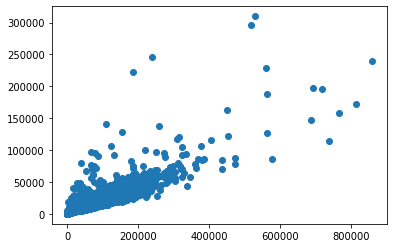

In [15]:
# 좋아요 수와 리트윗 수의 상관관계 시각화
x = tweets['favorites']
y = tweets['retweets']
plt.scatter(x,y)

일부 좋아요에 비해 리트윗이 과도하게 많은 데이터들이 있고 나머지의 경우 어떠한 선형적 경향성이 있는 것으로 판단된다.

각각에 대해 boxplot을 그려 이상치 유무를 파악하고 이를 제거

두 변수 모두 이상치가 많은 것으로 판단

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


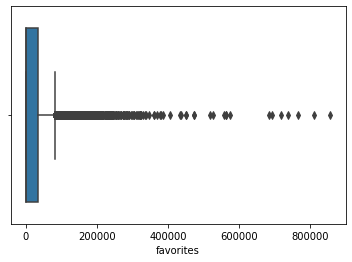

In [16]:
sns.boxplot(tweets['favorites'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


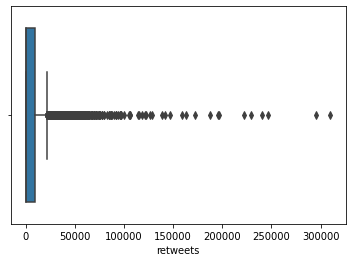

In [18]:
sns.boxplot(tweets['retweets'])

In [19]:
q1 = tweets['favorites'].quantile(0.25)
q3 = tweets['favorites'].quantile(0.75)
iqr_fa = q3-q1
q1 = tweets['retweets'].quantile(0.25)
q3 = tweets['retweets'].quantile(0.75)
iqr_re = q3-q1
alpha=3

In [20]:
df_re_out = tweets[tweets['favorites']< (tweets['favorites'].quantile(0.75)+alpha*iqr_fa)]
df_re_out = df_re_out[df_re_out['favorites']> (tweets['favorites'].quantile(0.25) - alpha*iqr_fa)]
df_re_out = df_re_out[df_re_out['retweets']<(df_re_out['retweets'].quantile(0.75)+alpha*iqr_re)]
df_re_out = df_re_out[df_re_out['retweets']> (tweets['retweets'].quantile(0.25) - alpha*iqr_re)]

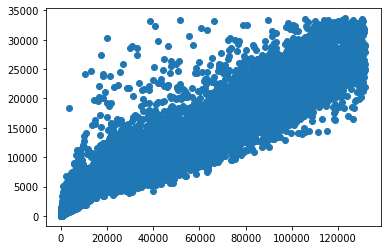

In [21]:
x = df_re_out['favorites']
y = df_re_out['retweets']
plt.scatter(x, y)

이상치가 제거된 데이터를 이용해 회귀분석을 수행하고 시각화

In [22]:
x = np.array(x).reshape(-1,1)
y= np.array(y).reshape(-1,1)
reg = lr.fit(x,y)

In [23]:
y2 = lr.coef_[0]*x + lr.intercept_

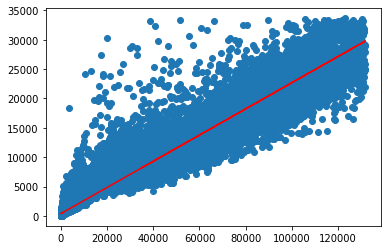

In [24]:
plt.scatter(x, y)
plt.plot(x, y2, color='red')

In [25]:
re_ols = sm.OLS(y, sm.add_constant(x)).fit()
re_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                 7.115e+05
Date:                Wed, 25 Jan 2023   Prob (F-statistic):               0.00
Time:                        03:30:09   Log-Likelihood:            -3.5599e+05
No. Observations:               40128   AIC:                         7.120e+05
Df Residuals:                   40126   BIC:                         7.120e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        391.3724      9.923     39.440      0.000     371.922     410.822
x1             0.2229      0.000    843.511      0.000       0.222       0.223
==============================================================================
Omnibus:                    25393.209   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           974072.819
Skew:                           2.485   Prob(JB):                         0.00
Kurtosis:                      26.619   Cond. No.                     4.33e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

선형 회귀분석결과 회귀식과 회귀계수 모두 유의미하게 유의하고 회귀식의 설명력(R^2)또한 0.947로 매우 높다. 즉, 리트윗과 좋아요가 상당한 양의 함수관계를 가지고 있는 것으로 확인<br><br>
-> 그렇다면 위 회귀식에서 많이 벗어난 샘플들의 원인을 파악할 필요성이 있다고 판단<br>(즉, 리트윗과 좋아요 둘중 한 가지만 지나치게 높은 경우)<br><br>
다음의 그림에서 빨간 회귀식과 차이가 큰 트윗들의 내용을 직접 파악할 예정

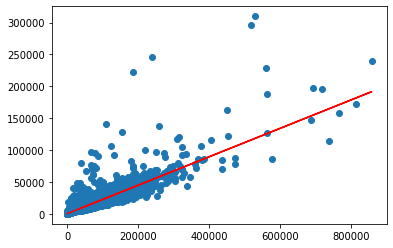

In [26]:
x_ori = tweets['favorites']
y_ori = tweets['retweets']
y2_ori = lr.coef_[0]*x_ori + lr.intercept_
plt.scatter(x_ori,y_ori)
plt.plot(x_ori, y2_ori, color='red')

## 노션 개인 과제 작성 페이지에서 상위 트윗들에 대해 따로 기재



In [27]:
df_rt_sort = tweets
df_rt_sort = df_rt_sort.sort_values(by = ['retweets'],ascending=False)
df_rt_sort

,id,content,date,retweets,favorites,mentions,hashtags
32059,881503147168071680,# FraudNewsCNN # FNNpic.twitter.com/WYUnHjjUjg,2017-07-02 15:21:42,309892,528265,NaN,# #
30895,795954831718498305,TODAY WE MAKE AMERICA GREAT AGAIN!,2016-11-08 12:43:14,295817,518347,NaN,NaN
15535,474134260149157888,Are you allowed to impeach a president for gro...,2014-06-04 12:23:11,246232,237843,NaN,NaN
38625,1157345692517634049,A$AP Rocky released from prison and on his way...,2019-08-02 19:41:30,240363,857678,NaN,NaN
33061,929511061954297857,Why would Kim Jong-un insult me by calling me ...,2017-11-12 01:48:01,229531,559317,NaN,NaN
...,...,...,...,...,...,...,...
10747,362884519168192513,@ ccalder0811 Thank you.,2013-08-01 12:36:26,0,0,@,NaN
8531,326981187887325184,@ RamboFo Great!,2013-04-24 10:49:24,0,1,@,NaN
6291,299615946337837056,@ bahia6085 Thanks Suz for your comments.,2013-02-07 21:29:42,0,0,@,NaN
10794,363289230162030592,@ not_that_actor I know!,2013-08-02 15:24:36,0,0,@,NaN


### 리트윗과 좋아요의 수가 분석에 주요한 영향을 미칠 것으로 판단하고 내림차순으로 정렬

In [75]:
fav = new.sort_values(by='favorites', ascending=False)[:1000]
fav

,id,content,date,retweets,favorites,mentions,hashtags
38625,1157345692517634049,A$AP Rocky released from prison and on his way...,2019-08-02 19:41:30,240363,857678,NaN,NaN
40959,1212924762827046918,,2020-01-03 03:32:53,171742,812508,NaN,NaN
40990,1214739853025394693,All is well! Missiles launched from Iran at tw...,2020-01-08 03:45:24,158748,766263,NaN,NaN
40868,1209812664601522178,MERRY CHRISTMAS!,2019-12-25 13:26:31,114052,738868,NaN,NaN
38394,1152307567634391041,Just spoke to @ KanyeWest about his friend A$A...,2019-07-19 22:01:47,195109,717895,@,NaN
...,...,...,...,...,...,...,...
40679,1205338255832555520,Looking like a big win for Boris in the U.K.!,2019-12-13 05:06:48,19789,127641,NaN,NaN
31371,829356871848951809,My daughter Ivanka has been treated so unfairl...,2017-02-08 16:51:01,23316,127594,@,NaN
33559,960868920428253184,So disgraceful that a person illegally in our ...,2018-02-06 14:32:57,30283,127493,@,NaN
38366,1151618791069114368,....Greatest Economic BOOM in the history of o...,2019-07-18 00:24:50,22742,127487,NaN,NaN


In [77]:
most_retweet = new.sort_values(by='retweets', ascending=False)[:1000]
most_retweet

,id,content,date,retweets,favorites,mentions,hashtags
32059,881503147168071680,# FraudNewsCNN # FNN,2017-07-02 15:21:42,309892,528265,NaN,# #
30895,795954831718498305,TODAY WE MAKE AMERICA GREAT AGAIN!,2016-11-08 12:43:14,295817,518347,NaN,NaN
15535,474134260149157888,Are you allowed to impeach a president for gro...,2014-06-04 12:23:11,246232,237843,NaN,NaN
38625,1157345692517634049,A$AP Rocky released from prison and on his way...,2019-08-02 19:41:30,240363,857678,NaN,NaN
33061,929511061954297857,Why would Kim Jong-un insult me by calling me ...,2017-11-12 01:48:01,229531,559317,NaN,NaN
...,...,...,...,...,...,...,...
41007,1215454244519718912,"Under my administration, we will NEVER make ex...",2020-01-10 03:04:08,29641,144102,NaN,NaN
32011,879405223399350272,Very grateful for the 9-O decision from the U....,2017-06-26 20:25:18,29626,121767,NaN,NaN
31458,835465719970217984,Maybe the millions of people who voted to MAKE...,2017-02-25 13:25:24,29614,141286,NaN,NaN
37286,1119019875203153921,Anything the Russians did concerning the 2016 ...,2019-04-19 01:28:23,29609,122248,NaN,NaN


In [78]:
# new.sort_values(by='favorites', ascending=False).head(60)

## 기간에 따른 트윗 발행 수

### 전체 트윗 발행 수

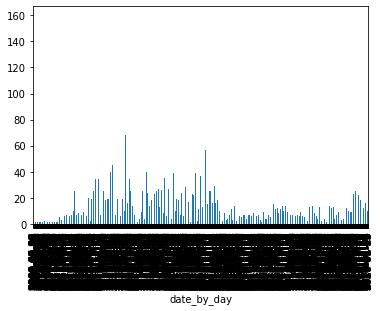

In [30]:
df_day_date = tweets
df_day_date['date_by_day'] = tweets['date'].dt.date
group = df_day_date.groupby('date_by_day').size().plot.bar()

### 연도별 트럼프의 트윗 발행 수

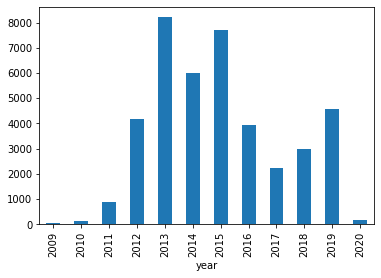

In [31]:
df_day_date['year'] = tweets['date'].dt.year 
df_day_date['month'] =  tweets['date'].dt.month
df_day_date.groupby('year').size().plot.bar()

https://www.hankyung.com/international/article/201506171631g

### 트럼프가 대선 출마를 선언한 연도는 2015년

# 워드 클라우드

기존에 배웠던 워드클라우드는 불용어를 제거하지 않았던 방법이었다. 불용어를 제거했을 때 결과가 어떻게 달라질지 다음의 사이트를 따라서 두 가지 방법 모두 사용하여 워드클라우드를 생성하였다.

https://mkjjo.github.io/python/2019/07/09/english_preprocessing.html

In [38]:
def get_wc(df):
  df_content = df['content']
  df_content = str(df_content)
  cleaned_content = re.sub(r'[^\.\?\!\w\d\s]','',df_content)
  cleaned_content = cleaned_content.lower()
  word_tokens = nltk.word_tokenize(cleaned_content)
  tokens_pos = nltk.pos_tag(word_tokens)
  NN_words = []
  for word, pos in tokens_pos:
      if 'NN' in pos:
          NN_words.append(word)
  wlem = nltk.WordNetLemmatizer()
  lemmatized_words = []
  for word in NN_words:
      new_word = wlem.lemmatize(word)
      lemmatized_words.append(new_word)
  stopwords_list = stopwords.words('english') #nltk에서 제공하는 불용어사전 이용
  unique_NN_words = set(lemmatized_words)
  final_NN_words = lemmatized_words

# 불용어 제거
  for word in unique_NN_words:
      if word in stopwords_list:
          while word in final_NN_words: final_NN_words.remove(word)
  noun_text = ''
  for word in final_NN_words:
      if word == 'donald' or word=='trump' or word=="l" or word == 'dtype' or word == 'object'or word == 'twitter' or word=='pic' or word=='twi' or word=='t' or word=='ter' or word=='twit' or word=='com':
        continue
      else:
        noun_text = noun_text +' '+word
  print(noun_text)
  print(len(noun_text))
  wordcloud = WordCloud(max_font_size=60, relative_scaling=.5,background_color='white').generate(noun_text)
  plt.figure()
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

In [41]:
print(stopwords_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

### 전체 트윗에 대한 워드 클라우드(불용어 제거)

 view tom ten tip blog post celebrity apprentice finale persona wallflower party stro mike bloomberg jack wi state house president proc show tonight f name length
162


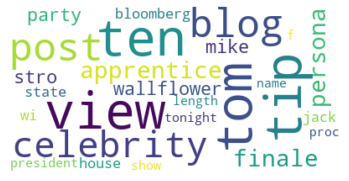

In [39]:
get_wc(tweets)

### 좋아요 수 상위 1000개 워드 클라우드(불용어 제거)

 rocky prison way missile iran tw merry christmas friend aa win boris u.k. daughter ivanka person .... boom history flynn fbi life name length
142


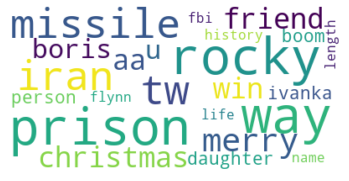

In [79]:
get_wc(fav)

좋아요 수 워드 클라우드에서 주목할 만한 것은 'iran'(이란), 'missile'(미사일)

### 리트윗 수 상위 1000개 워드 클라우드(불용어 제거)

 fnn today president gro rocky prison way jongun administration ex decision .... million people anything russian dream name length
130


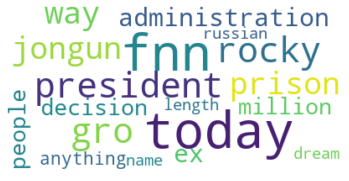

In [80]:
get_wc(most_retweet)

리트윗 수 워드 클라우드에서 주목할 만한 키워드는 'jongun'(김정은), 'fnn'(가짜뉴스 트윗)

## 연습문제에서 사용했던 워드클라우드 생성 코드(불용어 포함)

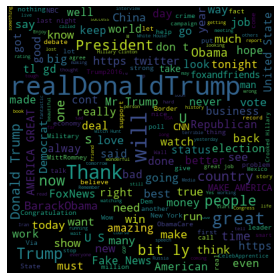

In [34]:
from wordcloud import WordCloud, STOPWORDS 
wordcloud = WordCloud(width = 400, height = 400, 
                     ).generate(noun_text) 
  
# WordCloud 출력                    
plt.figure(figsize = (4, 4), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout() 
plt.show()

In [81]:
fav_tweets = tweets.sort_values(by='favorites', ascending=False).head(100)
re_tweets = tweets.sort_values(by='retweets', ascending=False).head(100)

# FraudNewsCNN # FNN TODAY WE MAKE AMERICA GREAT AGAIN! Are you allowed to impeach a president for gross inpetence? A$AP Rocky released from prison and on his way home to the United States from Sweden. It was a Rocky Week, get home ASAP A$AP! Why would Kim Jong-un insult me by calling me "old," when I would NEVER call him "short and fat?" Oh well, I try so hard to be his friend - and maybe someday that will happen! Be prepared, there is a small chance that our horrendous leadership could unknowingly lead us into World War III.  Just spoke to @ KanyeWest about his friend A$AP Rocky’s incarceration. I will be calling the very talented Prime Minister of Sweden to see what we can do about helping A$AP Rocky. So many people would like to see this quickly resolved! Such a beautiful and important evening! The forgotten man and woman will never be forgotten again. We will all e together as never before  North Korean Leader Kim Jong Un just stated that the “Nuclear Button is on his desk at all 

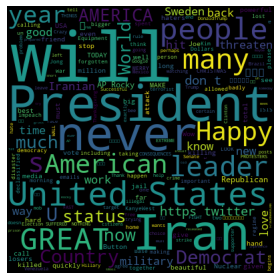

In [82]:
#리트윗순 상위 100개 워클
string = ' '.join(re_tweets['content'].values)
print(string)
# WordCloud 생성
from wordcloud import WordCloud, STOPWORDS 
wordcloud = WordCloud(width = 400, height = 400, 
                     ).generate(string) 
  
# WordCloud 출력                    
plt.figure(figsize = (4, 4), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout() 
plt.show()

A$AP Rocky released from prison and on his way home to the United States from Sweden. It was a Rocky Week, get home ASAP A$AP!  All is well! Missiles launched from Iran at two military bases located in Iraq. Assessment of casualties & damages taking place now. So far, so good! We have the most powerful and well equipped military anywhere in the world, by far! I will be making a statement tomorrow morning. MERRY CHRISTMAS! Just spoke to @ KanyeWest about his friend A$AP Rocky’s incarceration. I will be calling the very talented Prime Minister of Sweden to see what we can do about helping A$AP Rocky. So many people would like to see this quickly resolved!  The United States just spent Two Trillion Dollars on Military Equipment. We are the biggest and by far the BEST in the World! If Iran attacks an American Base, or any American, we will be sending some of that brand new beautiful equipment their way...and without hesitation! HAPPY NEW YEAR! Such a beautiful and important evening! The fo

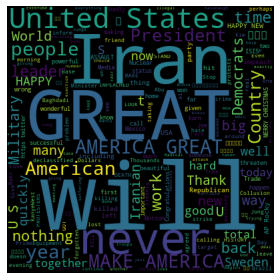

In [83]:
#좋아요순 상위 100개 워클
string = ' '.join(fav_tweets['content'].values)
print(string)
# WordCloud 생성
from wordcloud import WordCloud, STOPWORDS 
wordcloud = WordCloud(width = 400, height = 400, 
                     ).generate(string) 
  
# WordCloud 출력                    
plt.figure(figsize = (4, 4), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout() 
plt.show()

#### 딕셔너리 생성으로 만든 워드 클라우드 - 트럼프 대선 슬로건

In [35]:
count = {}
for t in tweets['content']:
  if not t in count.keys():
    count[t] = 1
  else:
    count[t] += 1
  
count

{'Be sure to tune in and watch Donald Trump on Late Night with David Letterman as he presents the Top Ten List tonight!': 1,
 'Donald Trump will be appearing on The View tomorrow morning to discuss Celebrity Apprentice and his new book Think Like A Champion!': 1,
 'Donald Trump reads Top Ten Financial Tips on Late Show with David Letterman: http://tinyurl.com/ooafwn - Very funny!': 1,
 'New Blog Post: Celebrity Apprentice Finale and Lessons Learned Along the Way: http://tinyurl.com/qlux5e': 1,
 '"My persona will never be that of a wallflower - I’d rather build walls than cling to them" --Donald J. Trump': 1,
 'Miss USA Tara Conner will not be fired - "I\'ve always been a believer in second chances." says Donald Trump': 1,
 'Listen to an interview with Donald Trump discussing his new book, Think Like A Champion: http://tinyurl.com/qs24vl': 1,
 '"Strive for wholeness and keep your sense of wonder intact." --Donald J. Trump http://tinyurl.com/pqpfvm': 1,
 'Enter the "Think Like A Champion

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



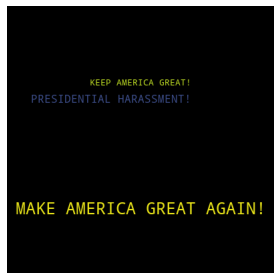

In [36]:
# 단어 갯수가 정리되어 있는 딕셔너리를 선택
dict_data = count
print(dict_data)

# WordCloud 생성
from wordcloud import WordCloud, STOPWORDS 
wordcloud = WordCloud(width = 400, height = 400, 
                      background_color ='black', 
                      stopwords = set(STOPWORDS), 
                      max_words=3,
                      max_font_size = 100,
                     ).generate_from_frequencies(dict_data) 
  
# WordCloud 출력                    
plt.figure(figsize = (4, 4), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout() 
plt.show()

트럼프가 트위터에서 반복적으로 게시한 트윗들

트럼프 선거 슬로건

## 기간별로 나눠서 워드 클라우드 수행

In [106]:
df_after = new[new['date']>'2016-11-09']
df_day = new[(new['date'] >= '2016-11-08') & (new['date']<'2016-11-09')]
df_before = new[new['date']<'2016-11-08']

 view tom ten tip blog post celebrity apprentice finale persona wallflower carolina thank america policy hey missouri hillary name length
137


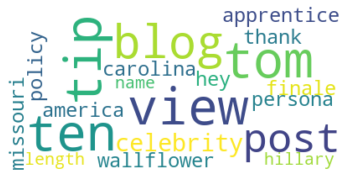

In [107]:
# 대선 이전
get_wc(df_before)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



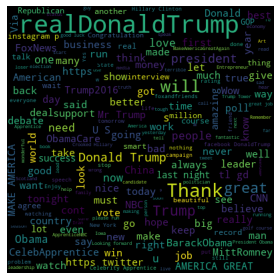

In [108]:
# 대선 이전
string = ' '.join(df_before['content'].values)
print(string)
# WordCloud 생성
from wordcloud import WordCloud, STOPWORDS 
wordcloud = WordCloud(width = 400, height = 400, 
                     ).generate(string) 
  
# WordCloud 출력                    
plt.figure(figsize = (4, 4), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout() 
plt.show()

 periscope join minute thank hampshire today florida news share hampshire tonight po hampshire thank today state today vote today vote poll let election result official dont name
178


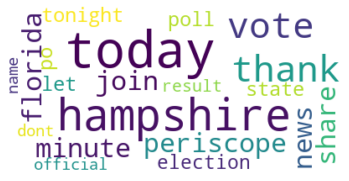

In [109]:
# 대선 당일
get_wc(df_day)

선거 당일 지역명 언급이 있던(늘어난) 것은 해당 지역의 트럼프 투표율이 높았기 때문 -> 샤이 트럼프(트럼프 지지를 밝히지 않았던 유권자들) 영향 -> 이에 트럼프의 감사 인사 트윗

https://www.hani.co.kr/arti/international/america/968507.html

LIVE on # Periscope: Join me for a few minutes in Pennsylvania. Get out & VOTE tomorrow. LETS # MAGA!!https://www.pscp.tv/w/au-0MDEyMzE3NDF8MXlvS01EQmFNYmx4UXtaU1dFdbs2hR83RLldPOOt9N_C3W-1tUxAlJep-jBY … Thank you Pennsylvania! Going to New Hampshire now and on to Michigan. Watch PA rally here: https://www.facebook./DonaldTrump/videos/10158079260770725/ … The big vote tomorrow! Today in Florida, I pledged to stand with the people of Cuba and Venezuela in their fight against oppression- cont: https://www.facebook./DonaldTrump/posts/10158080188865725 … – bei Wilkes-Barre/Scranton International Airport (AVP) Big news to share in New Hampshire tonight! Polls looking great! See you soon. – bei Wilkes-Barre/Scranton International Airport (AVP) Unbelievable evening in New Hampshire - THANK YOU! Flying to Grand Rapids, Michigan now. Watch NH rally here: 2fzummrNewHampshire … Today we are going to win the great state of MICHIGAN and we are going to WIN back the White House! Thank you MI! https:/

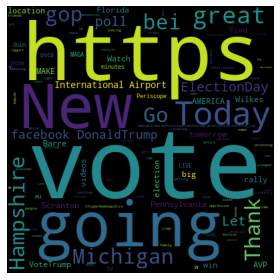

In [88]:
# 대선 당일
string = ' '.join(df_day['content'].values)
print(string)
# WordCloud 생성
from wordcloud import WordCloud, STOPWORDS 
wordcloud = WordCloud(width = 400, height = 400, 
                     ).generate(string) 
  
# WordCloud 출력                    
plt.figure(figsize = (4, 4), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout() 
plt.show()

 time election return electionnigh beautiful evening fo birthday marine corp day d.c. president oba party stro mike bloomberg jack wi state house president proc show tonight f name length
187


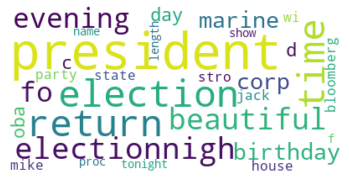

In [85]:
# 대선 이후
get_wc(df_after)

Still time to # VoteTrump! # iVoted # ElectionNight – bei Trump Tower Watching the returns at 9:45pm. # ElectionNight # MAGA – bei Trump Tower Such a beautiful and important evening! The forgotten man and woman will never be forgotten again. We will all e together as never before Happy 241st birthday to the U.S. Marine Corps! Thank you for your service!! A fantastic day in D.C. Met with President Obama for first time. Really good meeting, great chemistry. Melania liked Mrs. O a lot! Just had a very open and successful presidential election. Now professional protesters, incited by the media, are protesting. Very unfair! Love the fact that the small groups of protesters last night have passion for our great country. We will all e together and be proud! Busy day planned in New York. Will soon be making some very important decisions on the people who will be running our government! Today we express our deepest gratitude to all those who have served in our armed forces. # ThankAVet This wil

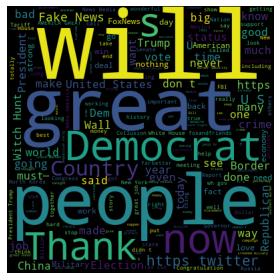

In [90]:
# 대선 이후
string = ' '.join(df_after['content'].values)
print(string)
# WordCloud 생성
from wordcloud import WordCloud, STOPWORDS 
wordcloud = WordCloud(width = 400, height = 400, 
                     ).generate(string) 
  
# WordCloud 출력                    
plt.figure(figsize = (4, 4), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout() 
plt.show()

hashtags, mentions는 좋아요 및 리트윗 수 상위에서 워드클라우드에 큰 영향을 주지 않는다.

In [99]:
no_hash = no_hash.sort_values(by='favorites', ascending=False).head(100)
no_mention = no_mention.sort_values(by='favorites', ascending=False).head(100)

In [110]:
# no_hash = no_hash.sort_values(by='retweets', ascending=False).head(100)
# no_mention = no_mention.sort_values(by='retweets', ascending=False).head(100)

TODAY WE MAKE AMERICA GREAT AGAIN! Are you allowed to impeach a president for gross inpetence? A$AP Rocky released from prison and on his way home to the United States from Sweden. It was a Rocky Week, get home ASAP A$AP! Why would Kim Jong-un insult me by calling me "old," when I would NEVER call him "short and fat?" Oh well, I try so hard to be his friend - and maybe someday that will happen!  Just spoke to @ KanyeWest about his friend A$AP Rocky’s incarceration. I will be calling the very talented Prime Minister of Sweden to see what we can do about helping A$AP Rocky. So many people would like to see this quickly resolved! Such a beautiful and important evening! The forgotten man and woman will never be forgotten again. We will all e together as never before  North Korean Leader Kim Jong Un just stated that the “Nuclear Button is on his desk at all times.” Will someone from his depleted and food starved regime please inform him that I too have a Nuclear Button, but it is a much big

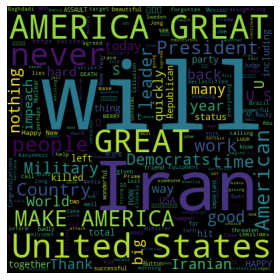

In [111]:
string = ' '.join(no_hash['content'].values)
print(string)
# WordCloud 생성
from wordcloud import WordCloud, STOPWORDS 
wordcloud = WordCloud(width = 400, height = 400, 
                     ).generate(string) 
  
# WordCloud 출력                    
plt.figure(figsize = (4, 4), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout() 
plt.show()

# FraudNewsCNN # FNN TODAY WE MAKE AMERICA GREAT AGAIN! Are you allowed to impeach a president for gross inpetence? A$AP Rocky released from prison and on his way home to the United States from Sweden. It was a Rocky Week, get home ASAP A$AP! Why would Kim Jong-un insult me by calling me "old," when I would NEVER call him "short and fat?" Oh well, I try so hard to be his friend - and maybe someday that will happen!  Such a beautiful and important evening! The forgotten man and woman will never be forgotten again. We will all e together as never before  North Korean Leader Kim Jong Un just stated that the “Nuclear Button is on his desk at all times.” Will someone from his depleted and food starved regime please inform him that I too have a Nuclear Button, but it is a much bigger & more powerful one than his, and my Button works! All is well! Missiles launched from Iran at two military bases located in Iraq. Assessment of casualties & damages taking place now. So far, so good! We have th

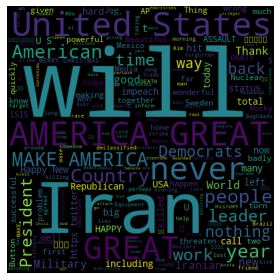

In [112]:
string = ' '.join(no_mention['content'].values)
print(string)
# WordCloud 생성
from wordcloud import WordCloud, STOPWORDS 
wordcloud = WordCloud(width = 400, height = 400, 
                     ).generate(string) 
  
# WordCloud 출력                    
plt.figure(figsize = (4, 4), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout() 
plt.show()

#- 결론
위의 회귀 추정식의 경향성을 크게 벗어나 좋아요에 비해 리트윗이 압도적으로 많은 경우 거의 모든 리트윗이 트럼프 전 대통령을 비판하고 비난하는 내용이다.
따라서 앞으로 어떤 새로운 트윗이 앞서 구한 회귀식과 차이가 크고 특히나 좋아요 수에 비해 리트윗이 매우 많다면 이는 사람들의 비난과 비판을 받고 있는 트윗일 가능성이 높으므로 이를 선거 토론회, 유세 등에서 활용이 가능할 것으로 보인다.